In [45]:
import healpy as hp
import numpy as np
import h5py, os
import matplotlib.pyplot as plt
import scipy.stats

In [46]:
n_side = 512
n_pix = hp.nside2npix(n_side)
out_dir = "/Users/arne/polybox/_PhD/23_HS/Conferences & Presentations/Meetings/230901"

In [51]:
map_file = "/Users/arne/data/DESY3/CosmoGrid/fiducial/cosmo_fiducial/perm_0000/projected_probes_maps_nobaryons512.h5"

dg = []
z_bins = ['desy3maglim1', 'desy3maglim2', 'desy3maglim3', 'desy3maglim4']
with h5py.File(map_file, "r") as f:
    for z_bin in z_bins:
        dg.append(f[f"dg/{z_bin}"][:])

dg = np.stack(dg, axis=-1)
dg = (dg - np.mean(dg, axis=0, keepdims=True))/np.mean(dg, axis=0, keepdims=True)
print(dg.shape)

(3145728, 4)


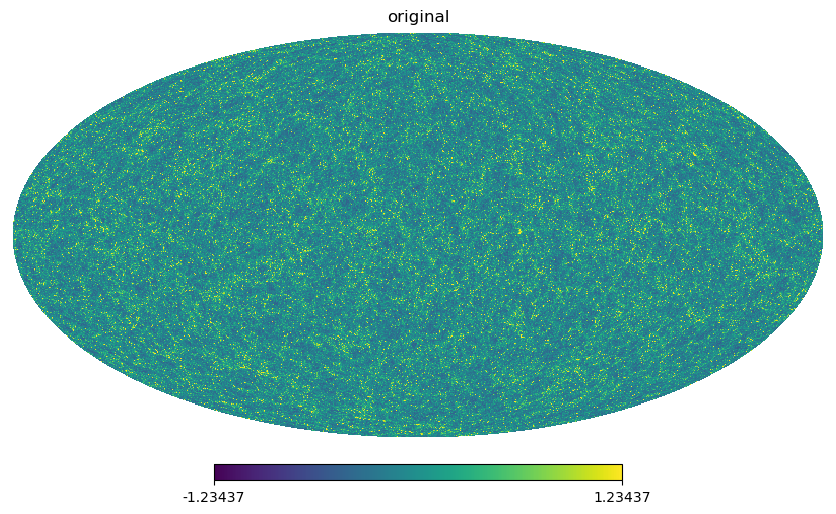

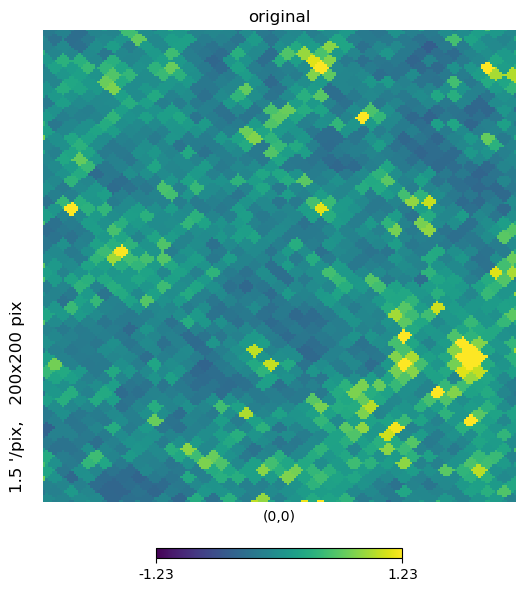

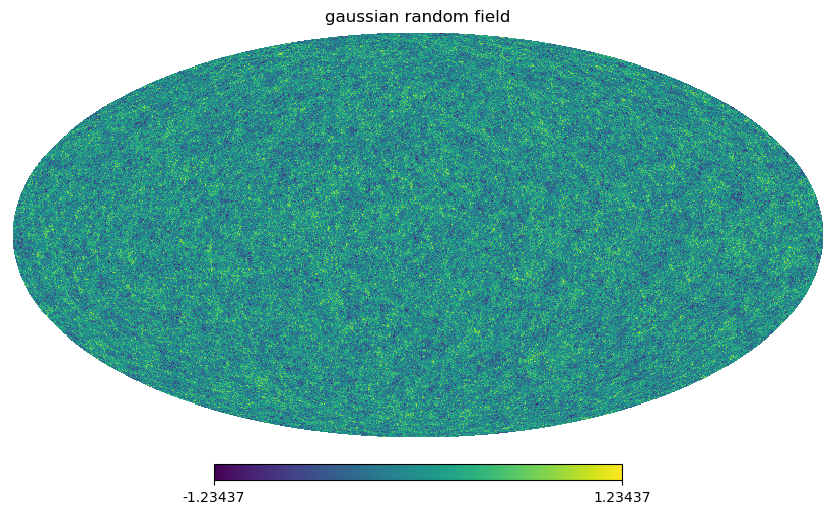

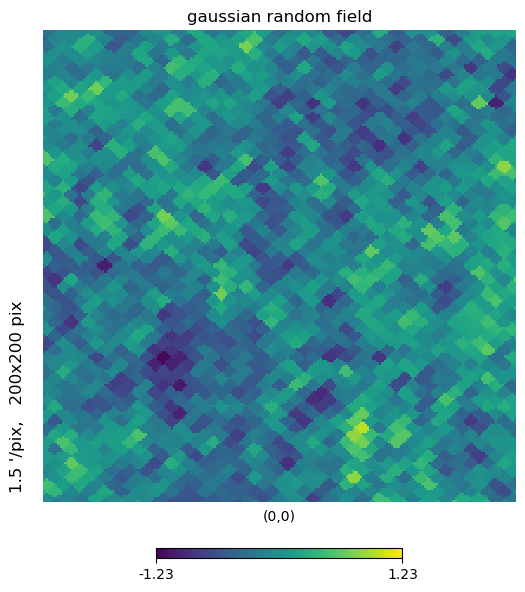

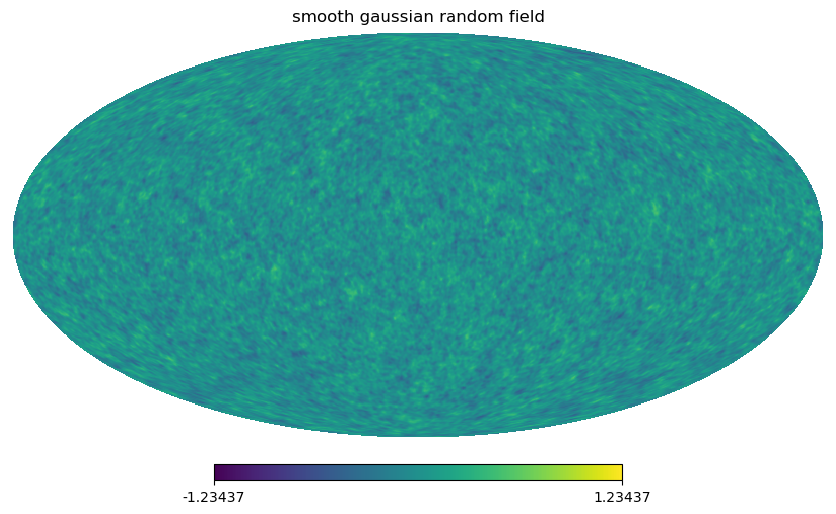

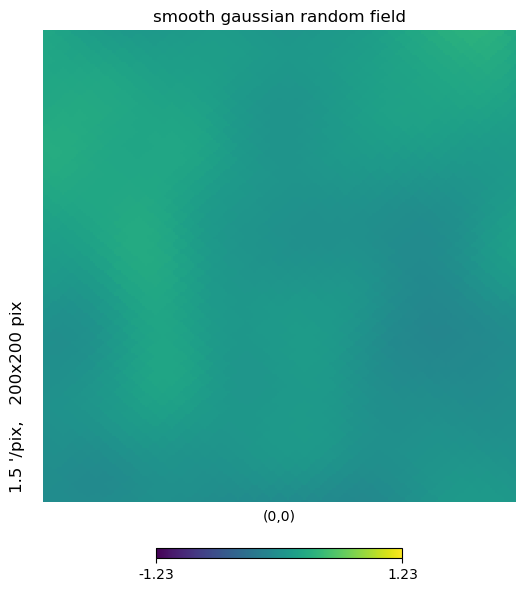

In [56]:
dg_example = dg[:,0]

vmax = np.quantile(np.abs(dg_example), 0.99)
vmin = - vmax

hp.mollview(dg_example, title="original", min=vmin, max=vmax)
hp.gnomview(dg_example, title="original", min=vmin, max=vmax)

cl = hp.anafast(dg_example, pol=False, use_pixel_weights=True)
grf = hp.synfast(cl, nside=n_side, pol=False)
hp.mollview(grf, title="gaussian random field", min=vmin, max=vmax)
hp.gnomview(grf, title="gaussian random field", min=vmin, max=vmax)

smooth_grf = hp.synfast(cl, nside=n_side, pol=False, fwhm=np.pi/200)
hp.mollview(smooth_grf, title="smooth gaussian random field", min=vmin, max=vmax)
hp.gnomview(smooth_grf, title="smooth gaussian random field", min=vmin, max=vmax)

In [ ]:
cl = 

In [48]:
l_maxs = 2**np.arange(6,11)
n_l = len(l_maxs)
n_z = dg.shape[-1]

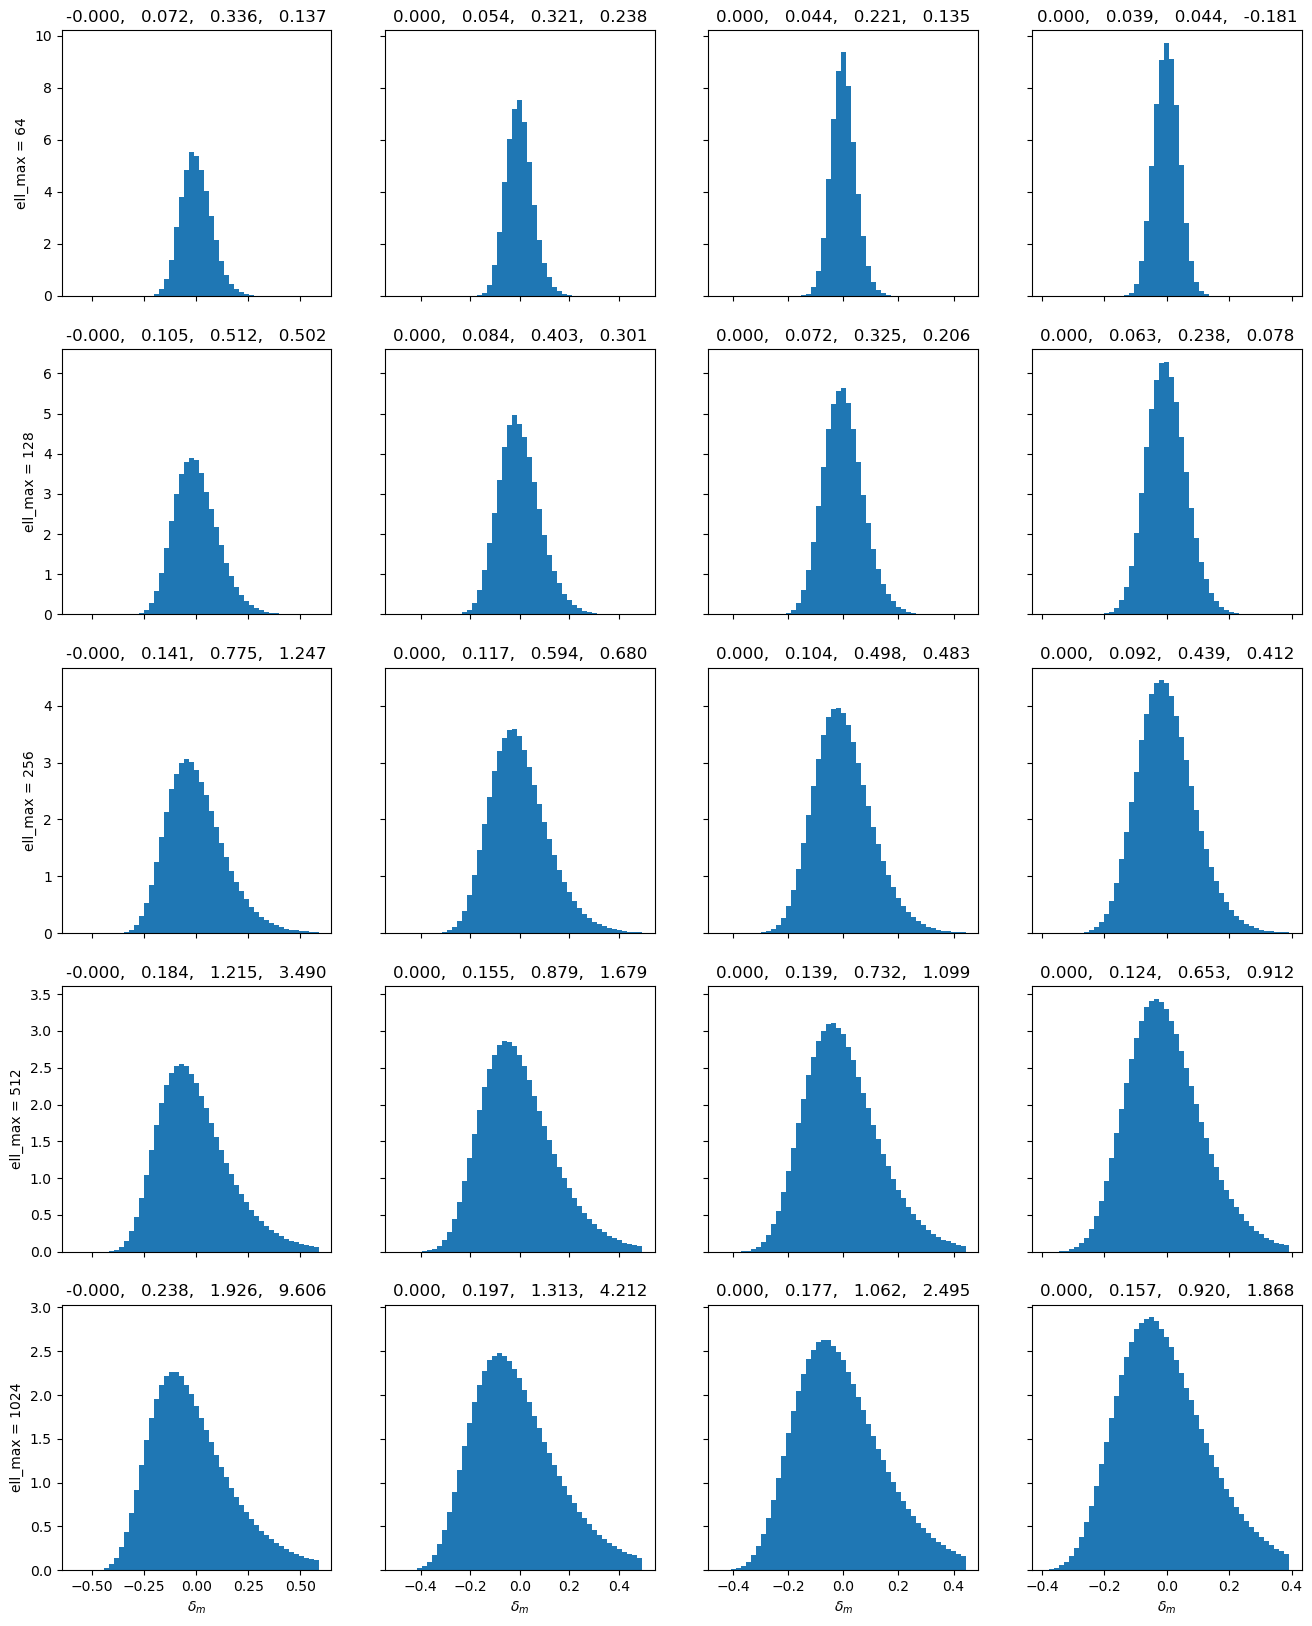

In [49]:
bin_max = np.quantile(np.abs(dg), 0.95, axis=0)
bin_min = - bin_max
bins = np.linspace(bin_min, bin_max, 50)

fig, ax = plt.subplots(figsize=(4*n_z,4*n_l), nrows=n_l, ncols=n_z, sharex="col", sharey="row")

for i in range(n_l):
    for j in range(n_z):
        # smoothing
        l_max = l_maxs[i]
        dg_smooth = hp.smoothing(dg[:,j], fwhm=np.pi/l_max, pol=False,use_pixel_weights=True, nest=False)

        # moments
        mean = np.mean(dg_smooth)
        std = np.std(dg_smooth)
        skew = scipy.stats.skew(dg_smooth)
        kurt = scipy.stats.kurtosis(dg_smooth)

        # plot
        ax[i,j].hist(dg_smooth, bins=bins[:,j], density=True)

        ax[i,j].set(title=f"{mean:.3f},   {std:.3f},   {skew:.3f},   {kurt:.3f}")
        if j == 0:
            ax[i,j].set(ylabel=f"ell_max = {l_max}")
        if i == n_l - 1:
            ax[i,j].set(xlabel=r"$\delta_m$")

fig.savefig(os.path.join(out_dir, "full_sky_moments_fixed_bins.png"), bbox_inches="tight", dpi=100)

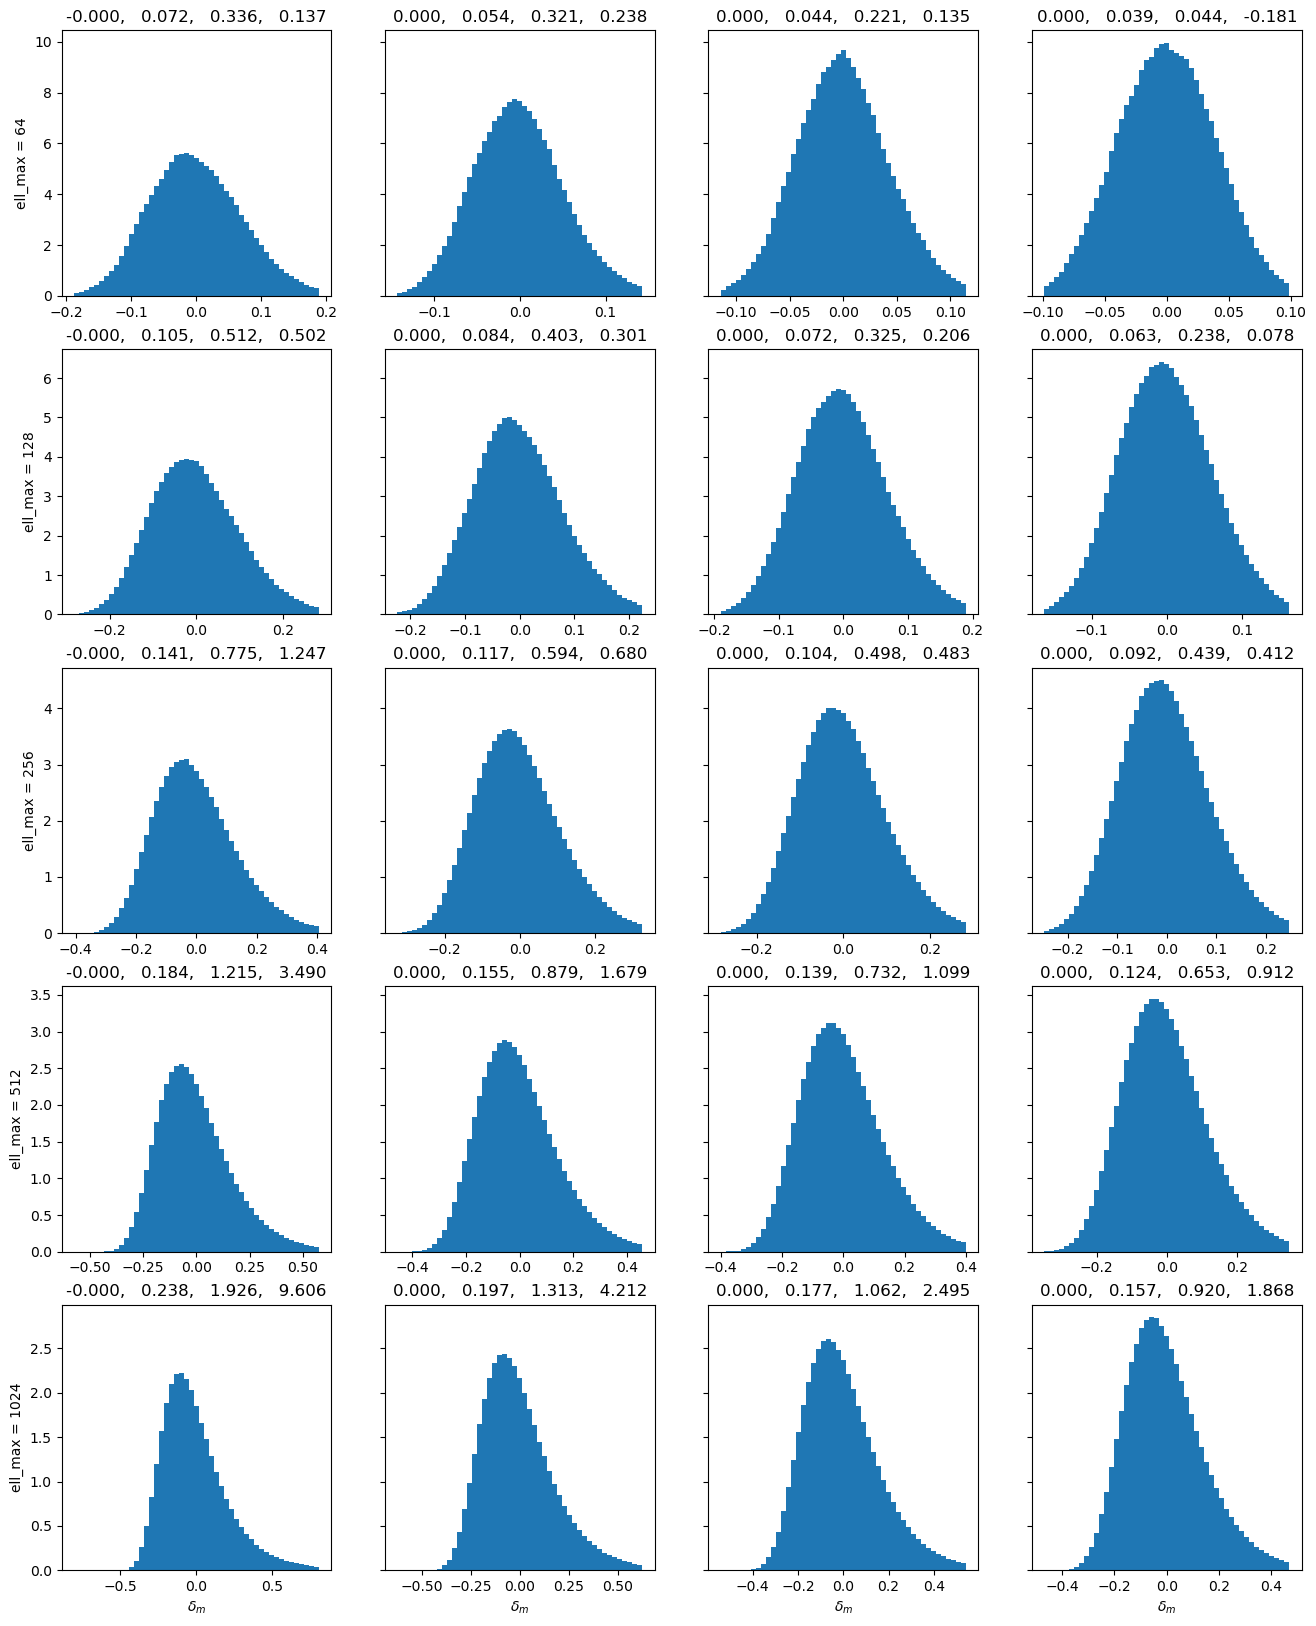

In [50]:
fig, ax = plt.subplots(figsize=(4*n_z,4*n_l), nrows=n_l, ncols=n_z, sharey="row")

for i in range(n_l):
    for j in range(n_z):
        # smoothing
        l_max = l_maxs[i]
        dg_smooth = hp.smoothing(dg[:,j], fwhm=np.pi/l_max, pol=False,use_pixel_weights=True, nest=False)

        # moments
        mean = np.mean(dg_smooth)
        std = np.std(dg_smooth)
        skew = scipy.stats.skew(dg_smooth)
        kurt = scipy.stats.kurtosis(dg_smooth)

        bin_max = np.quantile(np.abs(dg_smooth), 0.99, axis=0)
        bin_min = - bin_max
        bins = np.linspace(bin_min, bin_max, 50)

        # plot
        ax[i,j].hist(dg_smooth, bins=bins, density=True)

        ax[i,j].set(title=f"{mean:.3f},   {std:.3f},   {skew:.3f},   {kurt:.3f}")
        if j == 0:
            ax[i,j].set(ylabel=f"ell_max = {l_max}")
        if i == n_l - 1:
            ax[i,j].set(xlabel=r"$\delta_m$")

fig.savefig(os.path.join(out_dir, "full_sky_moments_individual_bins.png"), bbox_inches="tight", dpi=100)